# House Prices: Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting


## Table of content
1. [Framing the problem](#problem)
2. [Import the libraries](#imports)
3. [Load the data](#data) 
4. [Exploratory data analysis (EDA)](#eda) <br>
    4.1. [Missing data](#Missing)<br>
    4.2. [Histogram](#h)<br>
    4.3. [Correlations & Heatmap](#Heat)<br> 
    4.4. [Scatter plot](#scatter)<br>
    4.5. [Boxplot](#box)<br> 
5. [Preprocessing and Feature engineering](#preproc)<br>
    5.1. [Outliers](#out) <br>
    5.2. [Bad features](#bad) <br>
    5.3. [Fill missing values](#fill)<br>
6. [Model and Prediction](#pred)
7. [Metric and evaluation](#metric)

## 1. Framing the problem
<a id="problem"></a>
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

#### Practice Skills
Creative feature engineering 
Advanced regression techniques like random forest and gradient boosting

## 2. Import libraries
<a id="imports"></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Load the data
<a id="data"></a>

In [68]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

## 4. Exploratory data analysis (EDA)
<a id="eda"></a>

In [28]:
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [29]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 4.1. Missing data
<a id="Missing"></a>

In [7]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("The selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [8]:
missing_values_table(train_df)

The selected dataframe has 81 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


In [9]:
missing_values_table(test_df)

The selected dataframe has 80 columns.
There are 33 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1456,99.8
MiscFeature,1408,96.5
Alley,1352,92.7
Fence,1169,80.1
FireplaceQu,730,50.0
LotFrontage,227,15.6
GarageCond,78,5.3
GarageYrBlt,78,5.3
GarageQual,78,5.3
GarageFinish,78,5.3


### Visualize the missing data statistics:

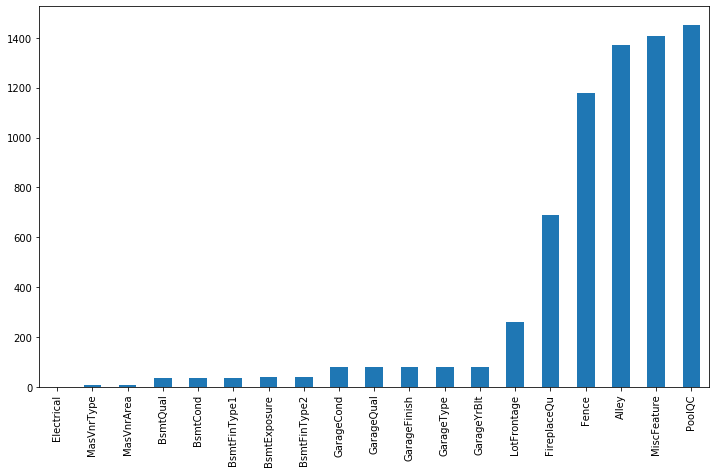

In [10]:
missing = train_df.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
plt.figure(figsize=(12,7))
missing.plot.bar()

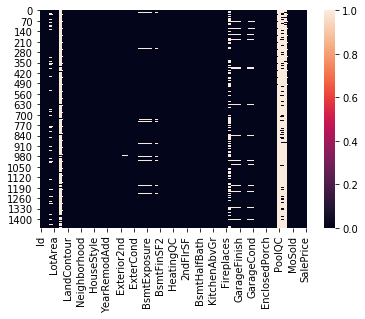

In [11]:
sns.heatmap(train_df.isnull());

### 4.2. Histogram
<a id="h"></a>

The SalePrice distribution is scewd to the right:

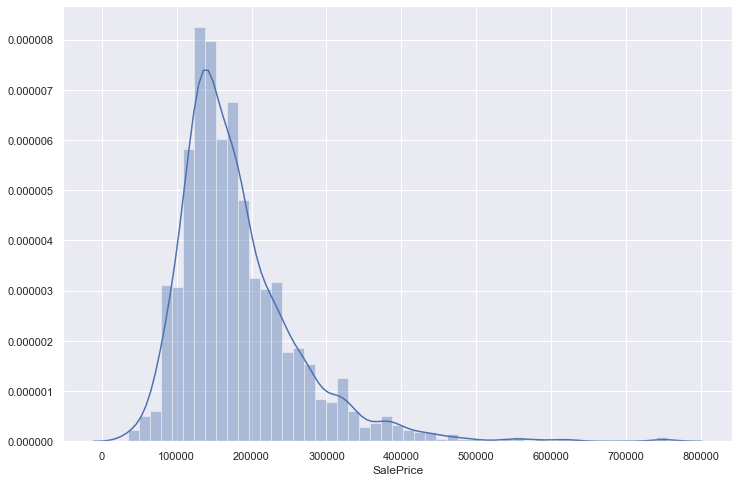

In [12]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(train_df['SalePrice']);

In [13]:
#skewness and kurtosis
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


#### Value count

In [15]:
train_df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

### 4.3. Correlations & Heatmap
<a id="Heat"></a>


## Corelations:
1) Cathegorical <br>
    1.1) ordinsl: e.g. rating with stars<br>
    1.2) nominal: e.g. cathegorical features

In [209]:
numeric_features = train_df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [210]:
cat_features = train_df.select_dtypes(include=[np.object])
cat_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [215]:
numeric_corr = numeric_features.corr()
c = numeric_corr['SalePrice'].sort_values(ascending=False)
print(c.index)


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
       'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')


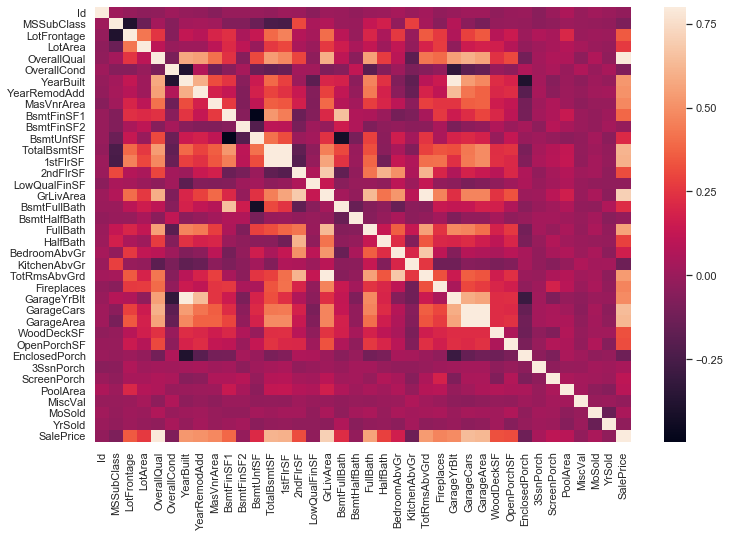

In [158]:
sns.heatmap(numeric_corr, vmax=0.8)

Heatmap using only the most important features:

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


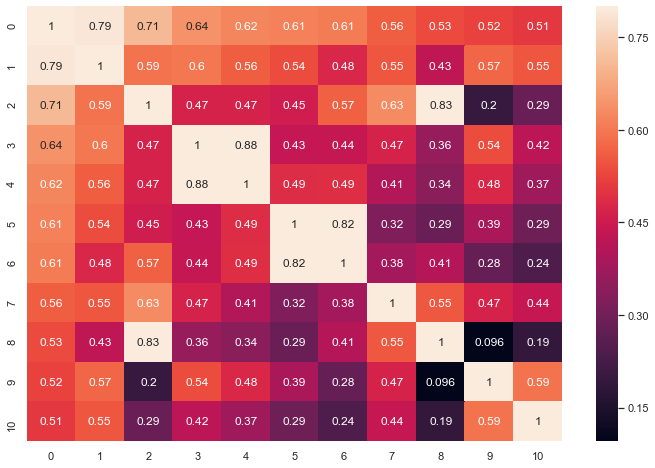

In [159]:
K = 11
features_corr = numeric_corr.nlargest(K,'SalePrice')['SalePrice'].index
print(features_corr)
cm = np.corrcoef(train_df[features_corr].values.T)
sns.heatmap(cm, vmax=0.8, annot=True)

### 4.4. Scatter plot
<a id="scatter"></a>

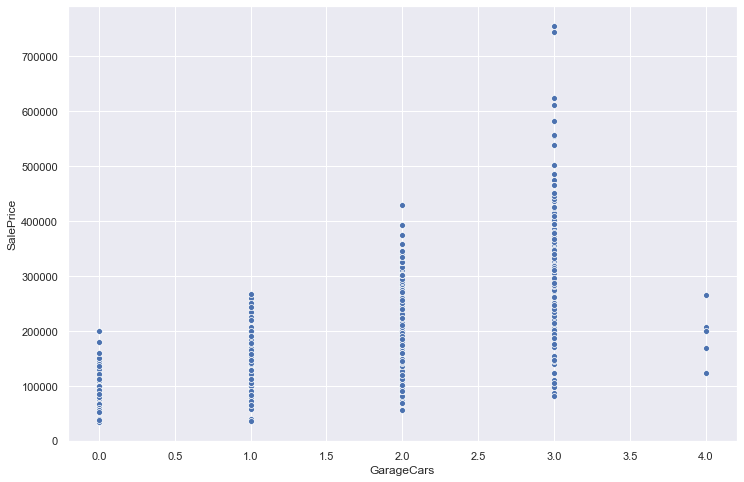

In [160]:
sns.scatterplot('GarageCars', 'SalePrice', data=train_df)

Visualisation of the most correlated features in scatterplots:
The scatter plots are revealing the outlier data which is better be eliminated for a more accurate model.

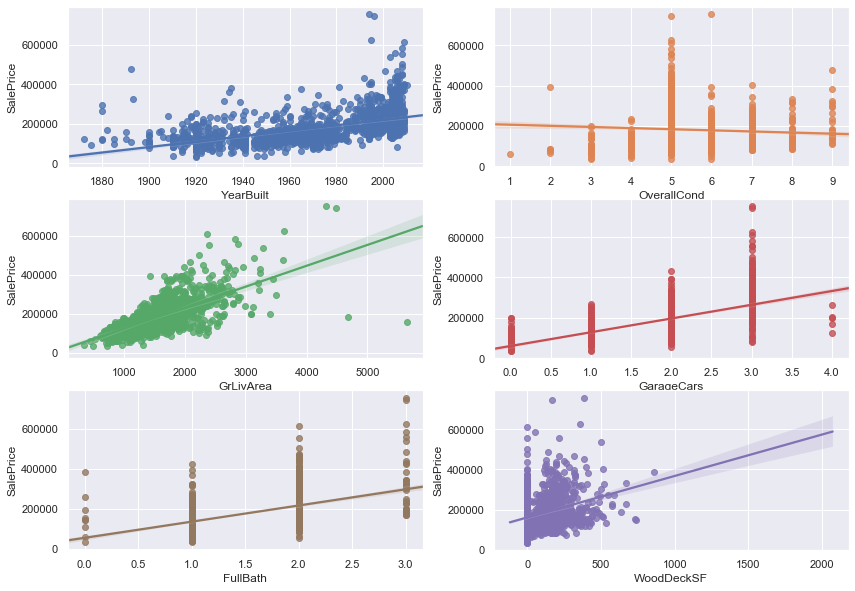

In [161]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3,2, figsize=(14,10))

sns.regplot('YearBuilt', 'SalePrice', data=train_df, fit_reg=True, ax=ax1)
sns.regplot('OverallCond', 'SalePrice', data=train_df, fit_reg=True, ax=ax2)
sns.regplot('GrLivArea', 'SalePrice', data=train_df, fit_reg=True, ax=ax3)
sns.regplot('GarageCars', 'SalePrice', data=train_df, fit_reg=True, ax=ax4)
sns.regplot('WoodDeckSF', 'SalePrice', data=train_df, fit_reg=True, ax=ax6)

sns.regplot('FullBath', 'SalePrice', data=train_df,fit_reg=True, ax=ax5);


### 4.5. Boxplot
<a id="box"></a>

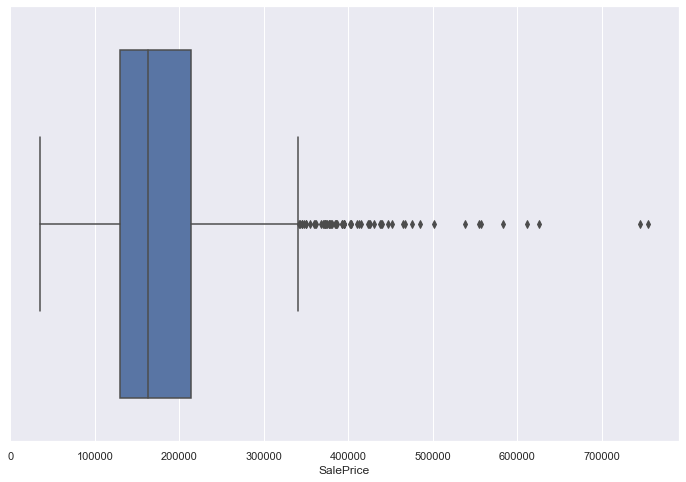

In [162]:
sns.boxplot(train_df['SalePrice'])

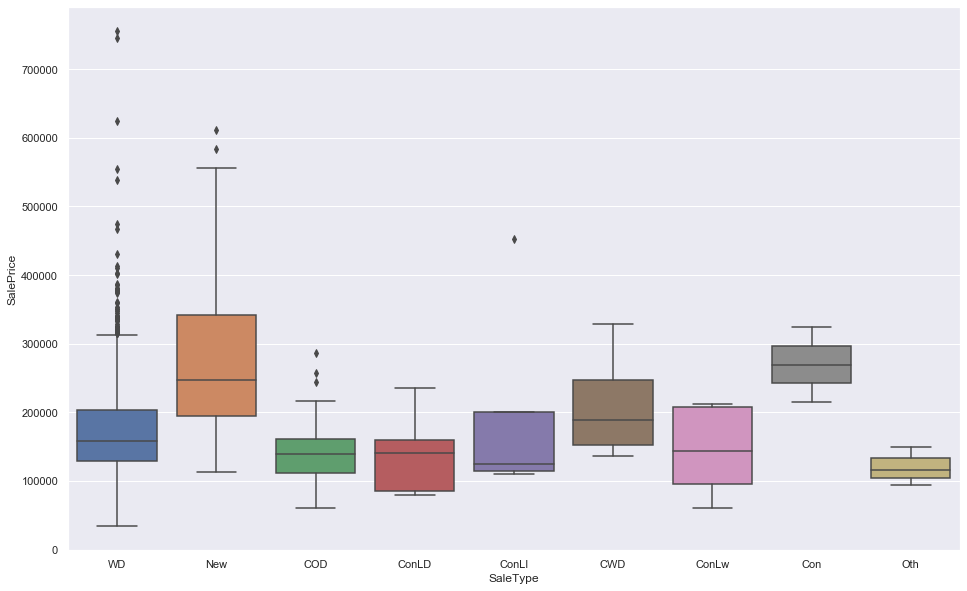

In [163]:
fig, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot('SaleType', 'SalePrice',data=train_df)

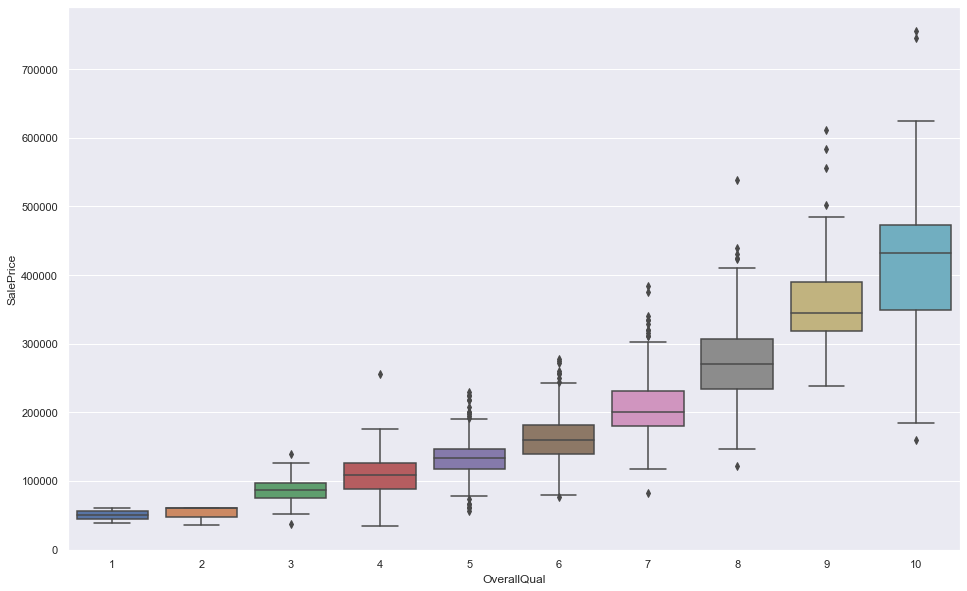

In [164]:
fig, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot('OverallQual', 'SalePrice',data=train_df)

## 5. Preprocessing and Feature engineering
<a id="preproc"></a>

### 5.1. Outliers
<a id="out"></a>

In [58]:
train_df.shape

(1460, 81)

In [59]:
first_quartile = train_df['SalePrice'].quantile(.25)
third_quartile = train_df['SalePrice'].quantile(.75)
IQR = third_quartile - first_quartile

In [60]:
boundary = third_quartile + 3*IQR 

In [61]:
train_df.drop(train_df[train_df['SalePrice']>boundary].index, axis=0, inplace=True)

In [62]:
train_df.shape

(1448, 81)

### 5.2. Bad features
<a id="bad"></a>

Multicollinear features:
1. GarageArea & GarageCars
2. GrLivArea & FillBath
3. TitalBsmtSF & 1stFlrSF
4. TotRmsAbvGrd & GrLivArea

Features with high amount of missing values:
5. PoolQC		$\;\;\;\;\;\;$99.8%
6. MiscFeature	$\;\;\;\;\;\;$96.5%
7. Alley		$\;\;\;\;\;\;$92.7%
8. Fence		$\;\;\;\;\;\;$80.1%
9. FireplaceQu	$\;\;\;\;\;\;$50.0% I decided to keep this one!

Features with low correlation with the target value 'SalePrice':
10. WoodDeckSF       $\;\;\;\;\;\;$ 0.324413
11. 2ndFlrSF        $\;\;\;\;\;\;$ 0.319334
12. OpenPorchSF  $\;\;\;\;\;\;$    0.315856
13. HalfBath    $\;\;\;\;\;\;$     0.284108
14. LotArea    $\;\;\;\;\;\;$      0.263843
15. BsmtFullBath $\;\;\;\;\;\;$    0.227122
16. BsmtUnfSF    $\;\;\;\;\;\;$    0.214479
17. BedroomAbvGr  $\;\;\;\;\;\;$   0.168213
18. ScreenPorch  $\;\;\;\;\;\;$    0.111447
19. PoolArea    $\;\;\;\;\;\;$     0.092404
20. MoSold      $\;\;\;\;\;\;$     0.046432
21. 3SsnPorch   $\;\;\;\;\;\;$     0.044584
22. BsmtFinSF2   $\;\;\;\;\;\;$   -0.011378
23. BsmtHalfBath  $\;\;\;\;\;\;$  -0.016844
24. MiscVal       $\;\;\;\;\;\;$  -0.021190
25. Id         $\;\;\;\;\;\;$     -0.021917
26. LowQualFinSF  $\;\;\;\;\;\;$  -0.025606
27. YrSold       $\;\;\;\;\;\;$   -0.028923
28. OverallCond  $\;\;\;\;\;\;$   -0.077856
29. MSSubClass    $\;\;\;\;\;\;$  -0.084284
30. EnclosedPorch $\;\;\;\;\;\;$  -0.128578
31. KitchenAbvGr  $\;\;\;\;\;\;$  -0.135907

In [63]:
cols_to_remove = ['WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF',
                  'BedroomAbvGr', 'ScreenPorch','PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
                  'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass','EnclosedPorch', 
                  'KitchenAbvGr', 'Alley', 'GarageYrBlt', 'PoolQC','Fence','MiscFeature']

In [64]:
train_df.drop(cols_to_remove, axis=1, inplace=True)

In [65]:
train_df.shape

(1448, 54)

In [66]:
train_df.columns


Index(['MSZoning', 'LotFrontage', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

### 5.3. Fill missing values:
<a id="fill"></a>

In [67]:
cols_to_fill = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtFinType2', 'MSZoning', 'GarageCond', 'GarageQual',
                'GarageFinish', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtExposure',
                'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1','MasVnrType', 'Electrical']
for column in cols_to_fill:
    train_df[column]=train_df[column].fillna(train_df[column].mod())



TypeError: f() missing 1 required positional argument: 'other'

In [55]:
missing_values_table(train_df)
#print(missing_values_table(train_df).index)

The selected dataframe has 54 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
FireplaceQu,690,47.7
LotFrontage,258,17.8
GarageType,81,5.6
GarageFinish,81,5.6
GarageQual,81,5.6
GarageCond,81,5.6
BsmtExposure,38,2.6
BsmtFinType2,38,2.6
BsmtQual,37,2.6
BsmtCond,37,2.6


## 6. Model and Prediction
<a id="pred"></a>

## 7. Metric and evaluation
<a id="metric"></a>